# Testing Linear Invertable Constraint Model

In [1]:
from link_bot_notebooks import linear_invertible_constraint_model
from link_bot_notebooks import toy_problem_optimization_common as tpo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
goal = np.array([[0], [0], [1], [0], [2], [0]])
dt = 0.1
args = {'checkpoint': "log_data/January_22_16:51:59__98a4e97c1f/nn.ckpt-50000", 'log': False, 'batch_size': 250}
dataset = "../../../link_bot_teleop/data/250_50_random.txt"
data = tpo.load_data(dataset, g=goal, extract_func=tpo.two_link_pos_vel_extractor)
log_data = np.loadtxt(dataset)

goal = np.array([[0], [0], [0], [1], [0], [2]])
trajectory_length_during_collection = tpo.parse_dataset_name(dataset, log_data)
x = tpo.load_train2(log_data, tpo.link_pos_vel_extractor2_indeces(), trajectory_length_during_collection, 1)
model = linear_invertible_constraint_model.LinearInvertibleModel(args, N=6, M=4, K=2, L=2, dt=0.1)

In [3]:
model.load()

INFO:tensorflow:Restoring parameters from log_data/January_22_16:51:59__98a4e97c1f/nn.ckpt-50000
Restored ckpt log_data/January_22_16:51:59__98a4e97c1f/nn.ckpt-50000 at step 50000


In [4]:
A_control, A_constraint, C, D, c_loss, sp_loss, cp_loss, constraint_loss, reg, loss = model.evaluate(x, goal, display=True)

Cost Loss: 0.00434426963329
State Prediction Loss: 0.0353420190513
Cost Prediction Loss: 0.0811022892594
Constraint Prediction Loss: 0.140000000596
Regularization: 3.79571609699e-08
Overall Loss: 0.260868400335
A_control:
[[ 0.6603031   0.18637158  0.23769888  0.00392958 -0.13474894 -0.0055236 ]
 [-0.00843639 -0.8341092   0.05847755  0.1293716  -0.03600967 -0.07508969]
 [ 0.7622578  -0.15348044 -0.2739156   0.00448291  0.15440038  0.00392296]
 [ 0.03046608 -0.49785417  0.0603526  -0.17561145 -0.02785106  0.09491652]]
A_constraint:
[[ 0.67865735 -0.9873752  -0.1089726  -0.19913623]
 [-1.4980463  -0.923301   -1.0607789  -1.2552066 ]]
B:
[[ 0.02072368 -0.0581773   0.00218378  0.08138384]
 [-0.11648379 -0.30307606  0.10146497  0.3520874 ]
 [ 0.24524151  0.08990301 -0.26812872  0.02879915]
 [ 0.08572971  0.23291151 -0.08268395 -0.26328486]]
C:
[[ 0.46424064  0.11293332]
 [-0.09074729 -0.43369934]
 [ 0.44645715 -0.03317403]
 [ 0.04165812 -0.41346088]]
D:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0.

In [5]:
print(model.hat_constraint_from_s(np.array([[0],[0],[0],[0],[0],[0]])))
print(model.hat_constraint_from_s(np.array([[1],[1],[0],[0],[0],[0]])))
print(model.hat_constraint_from_s(np.array([[1],[1],[1],[1],[1],[1]])))

[0.]
[0.]
[0.]


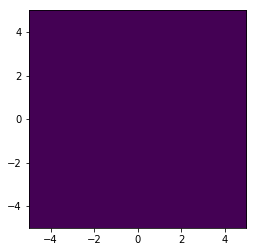

In [9]:
def plot_constraint_map(plt, model, data, g, resolution=0.1, minimum=-5, maximum=5):
    N = int((maximum - minimum) / resolution)
    colors = np.ndarray((N, N))
    for i in range(N):
        x = minimum + resolution * i
        for j in range(N):
            y = minimum + resolution * j
            s = np.array([[x], [y]])
            c = model.get_hat_constraint(s)[0]
            colors[N - j - 1, i] = c

    plt.imshow(colors, interpolation=None, extent=[minimum, maximum, minimum, maximum])

plot_constraint_map(plt, model, data, goal)
